In [3]:
import pandas as pd
import statsmodels.api as sm
file=pd.read_csv("C:/Users/deepika sakthivel/Downloads/Social_Network_Ads.csv")
df=pd.DataFrame(file)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(400, 5)

In [6]:
x=df.drop(['Purchased'],axis=1)
y=df["Purchased"]

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Gender"]=le.fit_transform(df['Gender'])

In [8]:
x=df.drop(['Purchased'],axis=1)
y=df["Purchased"]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [23]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [24]:
y_pred=classifier.predict(x_test)


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.95      0.96        58\n           1       0.88      0.95      0.91        22\n\n    accuracy                           0.95        80\n   macro avg       0.93      0.95      0.94        80\nweighted avg       0.95      0.95      0.95        80\n'

In [28]:
help (SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [29]:
from sklearn.svm import SVC
classifier2=SVC(kernel='rbf',random_state=0)
classifier2.fit(x_train,y_train)

SVC(random_state=0)

In [30]:
from sklearn.metrics import roc_curve

In [31]:
from sklearn.metrics import roc_auc_score

In [34]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [35]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first moel",roc_auc)

Area under the curve for first moel 0.95141065830721


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

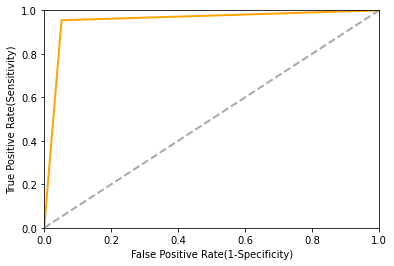

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')